In [1]:
import pandas as pd

data = pd.read_csv('ks.csv')
data.head()

,Название,Категория,Главная категория,Валюта,Дедлайн,Дата публикации,Состояние,Инвесторов,Страна,Собрано в долларах,Цель в долларах
0,"Don't Call it a Comeback ""Telescopes""",Music,Music,USD,2013-01-10,2012-12-09 06:03:52,successful,23,US,600.00,600.00
1,Arcade County (Canceled),Games,Games,USD,2012-04-29,2012-03-30 23:40:45,canceled,5,US,71.00,9000.00
2,Hayashi Skate Co. Solar Skateboard backpack,Accessories,Fashion,CAD,2017-07-22,2017-05-23 23:00:13,canceled,8,CA,360.36,2391.77
3,Me & You Coordinating Sunglasses- Optical Qual...,Accessories,Fashion,USD,2016-11-18,2016-10-19 22:06:41,failed,20,US,502.00,10000.00
4,New Carts for Istanbul Street Food Vendors,Food,Food,USD,2015-05-17,2015-04-17 18:10:47,successful,62,US,2414.00,1400.00


In [2]:
data = data[data['Состояние'].isin(['successful', 'failed'])]

In [3]:
data['Состояние'].value_counts()

Состояние
failed        197719
successful    133956
Name: count, dtype: int64

In [4]:
data.loc[(data['Состояние']=='failed'), 'таргет1'] = 0
data['таргет1'] = data['таргет1'].fillna(1)

In [5]:
data = data.drop('Состояние', axis = 1)
data.head()

,Название,Категория,Главная категория,Валюта,Дедлайн,Дата публикации,Инвесторов,Страна,Собрано в долларах,Цель в долларах,таргет1
0,"Don't Call it a Comeback ""Telescopes""",Music,Music,USD,2013-01-10,2012-12-09 06:03:52,23,US,600.00,600.0,1.0
3,Me & You Coordinating Sunglasses- Optical Qual...,Accessories,Fashion,USD,2016-11-18,2016-10-19 22:06:41,20,US,502.00,10000.0,0.0
4,New Carts for Istanbul Street Food Vendors,Food,Food,USD,2015-05-17,2015-04-17 18:10:47,62,US,2414.00,1400.0,1.0
5,New Improv Comedy Venue in Des Moines,Theater,Theater,USD,2013-06-17,2013-05-03 16:17:21,86,US,10030.88,10000.0,1.0
6,The Seer and the Sword,Shorts,Film & Video,USD,2012-08-11,2012-07-12 05:19:53,0,US,0.00,10000.0,0.0


In [6]:
data = data.rename({'Собрано в долларах': 'таргет2'},axis = 1)
data.head()

,Название,Категория,Главная категория,Валюта,Дедлайн,Дата публикации,Инвесторов,Страна,таргет2,Цель в долларах,таргет1
0,"Don't Call it a Comeback ""Telescopes""",Music,Music,USD,2013-01-10,2012-12-09 06:03:52,23,US,600.00,600.0,1.0
3,Me & You Coordinating Sunglasses- Optical Qual...,Accessories,Fashion,USD,2016-11-18,2016-10-19 22:06:41,20,US,502.00,10000.0,0.0
4,New Carts for Istanbul Street Food Vendors,Food,Food,USD,2015-05-17,2015-04-17 18:10:47,62,US,2414.00,1400.0,1.0
5,New Improv Comedy Venue in Des Moines,Theater,Theater,USD,2013-06-17,2013-05-03 16:17:21,86,US,10030.88,10000.0,1.0
6,The Seer and the Sword,Shorts,Film & Video,USD,2012-08-11,2012-07-12 05:19:53,0,US,0.00,10000.0,0.0


In [7]:
data['Дедлайн'] = pd.to_datetime(data['Дедлайн'])
data['Дата публикации'] = pd.to_datetime(data['Дата публикации'])

In [8]:
data['Срок'] = (data['Дедлайн'] - data['Дата публикации']).dt.days

In [9]:
data['Год публикации'] = (data['Дата публикации']).dt.year

In [10]:
Macro = pd.read_excel("macrofeatures.xlsx", engine = "openpyxl")
Macro.head()

,Unnamed: 0,Close_brent,Close_sugar,Close_cereals,Close_index_moex,Close_index_moex_10,Close_index_RGBI,Close_index_RTS_oil_and_gas,Close_index_RTS_metallurgy,Close_index_RTS_consumer_sector,Close_index_RTS_telecom,Close_index_RTS_finance,Close_index_RTS_transport,Close_index_RTS_chemicals,Close_index_RTS_broad_market,Close_index_RTS_electricity,dlk_cob_date
0,0,34.41,13.97,442.75,1797.27,3940.81,125.59,123.40,111.97,196.55,70.17,140.57,27.06,177.38,530.59,32.49,2016-02-24
1,1,35.06,14.24,445.25,1803.89,3977.35,126.44,124.22,112.51,198.03,70.56,142.64,27.43,179.48,536.20,33.07,2016-02-25
2,2,35.13,14.00,443.25,1816.73,4027.23,126.90,125.38,113.44,200.13,71.94,145.45,28.06,181.56,544.73,33.55,2016-02-26
3,3,36.64,14.36,445.00,1840.17,4084.24,126.87,126.69,114.66,200.32,72.41,147.22,28.49,186.76,552.82,34.41,2016-02-29
4,4,36.60,14.39,438.50,1844.17,4087.06,127.78,129.72,117.09,204.30,74.26,150.04,30.12,190.67,565.45,34.96,2016-03-01


In [11]:
Macro = Macro[['Close_brent', 'dlk_cob_date']].drop_duplicates()

In [12]:
Macro['dlk_cob_date'] = pd.to_datetime(Macro['dlk_cob_date'])
data['Дата публикации'] = data['Дата публикации'].astype('datetime64[ns]')

In [13]:
data = pd.merge(data,
        Macro,
        left_on = ['Дата публикации'],
        right_on = ['dlk_cob_date'],
        how = 'left')


In [14]:
data = data.sort_values('Дата публикации')
data['Close_brent'] = data['Close_brent'].ffill()

In [15]:
data['Close_brent'] = data['Close_brent'].fillna(float(data['Close_brent'].dropna().iloc[0]))

In [16]:
data = data.drop(['Дедлайн', 'Дата публикации', 'dlk_cob_date'], axis = 1)

In [17]:
data = data.drop(['Название', 'Страна', 'Инвесторов'], axis = 1)

In [18]:
data

,Категория,Главная категория,Валюта,таргет2,Цель в долларах,таргет1,Срок,Год публикации,Close_brent
176128,Fashion,Fashion,USD,625.00,1000.00,0.0,39,2009,50.96
241929,Shorts,Film & Video,USD,22.00,80000.00,0.0,87,2009,50.96
244460,Illustration,Art,USD,35.00,20.00,1.0,8,2009,50.96
80845,Software,Technology,USD,145.00,99.00,1.0,79,2009,50.96
181197,Fashion,Fashion,USD,387.00,1900.00,0.0,28,2009,50.96
...,...,...,...,...,...,...,...,...,...
247730,Games,Games,EUR,269.84,35.98,1.0,2,2017,46.05
318187,Tabletop Games,Games,GBP,544.77,271.03,1.0,4,2017,46.05
264474,Apparel,Fashion,USD,202.00,200.00,1.0,3,2017,46.05
293634,Tabletop Games,Games,USD,265.00,250.00,1.0,1,2017,46.05


In [19]:
data = pd.concat((data, pd.get_dummies(data['Валюта'])), axis = 1)
data = data.drop(['Валюта'],axis = 1)

In [20]:
data

,Категория,Главная категория,таргет2,Цель в долларах,таргет1,Срок,Год публикации,Close_brent,AUD,CAD,...,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
176128,Fashion,Fashion,625.00,1000.00,0.0,39,2009,50.96,False,False,...,False,False,False,False,False,False,False,False,False,True
241929,Shorts,Film & Video,22.00,80000.00,0.0,87,2009,50.96,False,False,...,False,False,False,False,False,False,False,False,False,True
244460,Illustration,Art,35.00,20.00,1.0,8,2009,50.96,False,False,...,False,False,False,False,False,False,False,False,False,True
80845,Software,Technology,145.00,99.00,1.0,79,2009,50.96,False,False,...,False,False,False,False,False,False,False,False,False,True
181197,Fashion,Fashion,387.00,1900.00,0.0,28,2009,50.96,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247730,Games,Games,269.84,35.98,1.0,2,2017,46.05,False,False,...,True,False,False,False,False,False,False,False,False,False
318187,Tabletop Games,Games,544.77,271.03,1.0,4,2017,46.05,False,False,...,False,True,False,False,False,False,False,False,False,False
264474,Apparel,Fashion,202.00,200.00,1.0,3,2017,46.05,False,False,...,False,False,False,False,False,False,False,False,False,True
293634,Tabletop Games,Games,265.00,250.00,1.0,1,2017,46.05,False,False,...,False,False,False,False,False,False,False,False,False,True


In [21]:
data = data.drop(['AUD'], axis = 1)

In [22]:
data = pd.concat((data, pd.get_dummies(data['Главная категория'])), axis = 1)
data = data.drop(['Главная категория'], axis = 1)

In [23]:
data = data.drop(['Games'], axis = 1)

In [24]:
data

,Категория,таргет2,Цель в долларах,таргет1,Срок,Год публикации,Close_brent,CAD,CHF,DKK,...,Design,Fashion,Film & Video,Food,Journalism,Music,Photography,Publishing,Technology,Theater
176128,Fashion,625.00,1000.00,0.0,39,2009,50.96,False,False,False,...,False,True,False,False,False,False,False,False,False,False
241929,Shorts,22.00,80000.00,0.0,87,2009,50.96,False,False,False,...,False,False,True,False,False,False,False,False,False,False
244460,Illustration,35.00,20.00,1.0,8,2009,50.96,False,False,False,...,False,False,False,False,False,False,False,False,False,False
80845,Software,145.00,99.00,1.0,79,2009,50.96,False,False,False,...,False,False,False,False,False,False,False,False,True,False
181197,Fashion,387.00,1900.00,0.0,28,2009,50.96,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247730,Games,269.84,35.98,1.0,2,2017,46.05,False,False,False,...,False,False,False,False,False,False,False,False,False,False
318187,Tabletop Games,544.77,271.03,1.0,4,2017,46.05,False,False,False,...,False,False,False,False,False,False,False,False,False,False
264474,Apparel,202.00,200.00,1.0,3,2017,46.05,False,False,False,...,False,True,False,False,False,False,False,False,False,False
293634,Tabletop Games,265.00,250.00,1.0,1,2017,46.05,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
data['Категория'] = data['Категория'].map(data.groupby(['Категория'])['таргет2'].mean())

In [26]:
data.head()

,Категория,таргет2,Цель в долларах,таргет1,Срок,Год публикации,Close_brent,CAD,CHF,DKK,...,Design,Fashion,Film & Video,Food,Journalism,Music,Photography,Publishing,Technology,Theater
176128,6035.989239,625.0,1000.0,0.0,39,2009,50.96,False,False,False,...,False,True,False,False,False,False,False,False,False,False
241929,3591.033473,22.0,80000.0,0.0,87,2009,50.96,False,False,False,...,False,False,True,False,False,False,False,False,False,False
244460,3661.424550,35.0,20.0,1.0,8,2009,50.96,False,False,False,...,False,False,False,False,False,False,False,False,False,False
80845,4321.245721,145.0,99.0,1.0,79,2009,50.96,False,False,False,...,False,False,False,False,False,False,False,False,True,False
181197,6035.989239,387.0,1900.0,0.0,28,2009,50.96,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [27]:
data = data.drop(['таргет1'], axis = 1)

In [28]:
data

,Категория,таргет2,Цель в долларах,Срок,Год публикации,Close_brent,CAD,CHF,DKK,EUR,...,Design,Fashion,Film & Video,Food,Journalism,Music,Photography,Publishing,Technology,Theater
176128,6035.989239,625.00,1000.00,39,2009,50.96,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
241929,3591.033473,22.00,80000.00,87,2009,50.96,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
244460,3661.424550,35.00,20.00,8,2009,50.96,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
80845,4321.245721,145.00,99.00,79,2009,50.96,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
181197,6035.989239,387.00,1900.00,28,2009,50.96,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247730,7635.064778,269.84,35.98,2,2017,46.05,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
318187,38415.722876,544.77,271.03,4,2017,46.05,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
264474,6098.303122,202.00,200.00,3,2017,46.05,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
293634,38415.722876,265.00,250.00,1,2017,46.05,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
X = data.drop(['таргет2'], axis = 1)
Y = data['таргет2']

In [48]:
X

,Категория,Цель в долларах,Срок,Год публикации,Close_brent,CAD,CHF,DKK,EUR,GBP,...,Design,Fashion,Film & Video,Food,Journalism,Music,Photography,Publishing,Technology,Theater
176128,6035.989239,1000.00,39,2009,50.96,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
241929,3591.033473,80000.00,87,2009,50.96,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
244460,3661.424550,20.00,8,2009,50.96,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
80845,4321.245721,99.00,79,2009,50.96,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
181197,6035.989239,1900.00,28,2009,50.96,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247730,7635.064778,35.98,2,2017,46.05,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
318187,38415.722876,271.03,4,2017,46.05,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
264474,6098.303122,200.00,3,2017,46.05,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
293634,38415.722876,250.00,1,2017,46.05,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
Y

176128    625.00
241929     22.00
244460     35.00
80845     145.00
181197    387.00
           ...  
247730    269.84
318187    544.77
264474    202.00
293634    265.00
23315     513.60
Name: таргет2, Length: 331675, dtype: float64

In [58]:
cols_to_check = ['Цель в долларах', 'Срок', 'Close_brent', 'Год публикации']
df = pd.concat((X[cols_to_check], Y), axis = 1).corr()
df

,Цель в долларах,Срок,Close_brent,Год публикации,таргет2
Цель в долларах,1.000000,0.021607,-0.000295,0.012320,0.006354
Срок,0.021607,1.000000,0.060106,-0.171189,0.008651
Close_brent,-0.000295,0.060106,1.000000,-0.607182,-0.017337
Год публикации,0.012320,-0.171189,-0.607182,1.000000,0.025158
таргет2,0.006354,0.008651,-0.017337,0.025158,1.000000


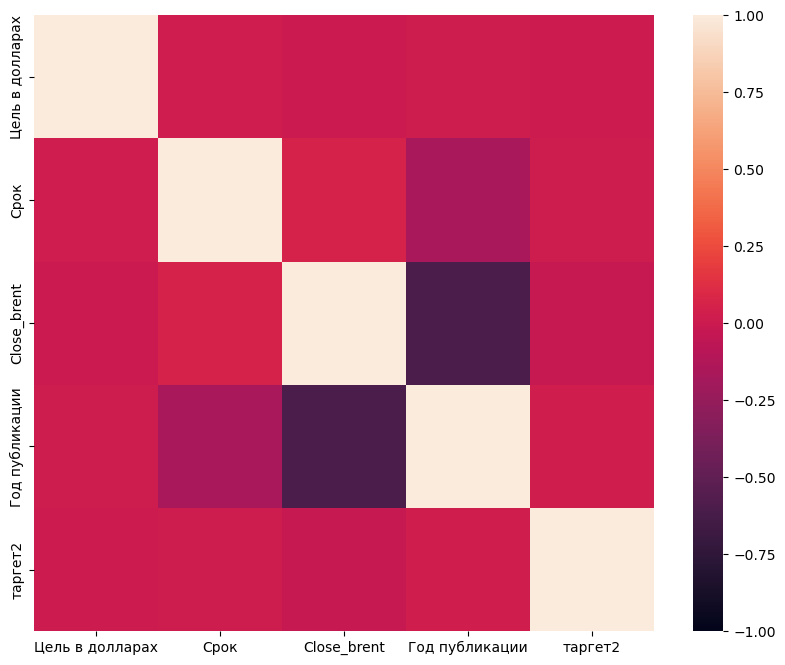

In [61]:
# Построение тепловой карты
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(10,8)

sns.heatmap(df,
           xticklabels = df.columns,
           yticklabels = df.columns,
           vmin = -1,
           vmax = +1)

plt.show()

In [71]:
from sklearn.feature_selection import VarianceThreshold 

variance = VarianceThreshold(threshold = 1)
variance.fit(X)

VarianceThreshold(threshold=1)

In [72]:
variance.get_feature_names_out()

array(['Категория', 'Цель в долларах', 'Срок', 'Год публикации',
       'Close_brent'], dtype=object)

In [39]:
X.shape

(331675, 32)

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(model, n_features_to_select = 10)
sfs.fit(X, Y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=10)

In [43]:
sfs.get_support()

array([ True,  True, False,  True, False, False, False, False, False,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False])

In [44]:
sfs.get_feature_names_out()

array(['Категория', 'Цель в долларах', 'Год публикации', 'GBP', 'HKD',
       'JPY', 'MXN', 'SGD', 'USD', 'Crafts'], dtype=object)

In [45]:
X[sfs.get_feature_names_out()]

,Категория,Цель в долларах,Год публикации,GBP,HKD,JPY,MXN,SGD,USD,Crafts
176128,6035.989239,1000.00,2009,False,False,False,False,False,True,False
241929,3591.033473,80000.00,2009,False,False,False,False,False,True,False
244460,3661.424550,20.00,2009,False,False,False,False,False,True,False
80845,4321.245721,99.00,2009,False,False,False,False,False,True,False
181197,6035.989239,1900.00,2009,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
247730,7635.064778,35.98,2017,False,False,False,False,False,False,False
318187,38415.722876,271.03,2017,True,False,False,False,False,False,False
264474,6098.303122,200.00,2017,False,False,False,False,False,True,False
293634,38415.722876,250.00,2017,False,False,False,False,False,True,False


In [47]:
sfs_backward = SequentialFeatureSelector(model,
                                         n_features_to_select = 27, 
                                         direction = 'backward')
sfs_backward.fit(X, Y)

KeyboardInterrupt: 

In [36]:
from sklearn.linear_model import Lasso

model = Lasso(alpha = 150)
model.fit(X,Y)


Lasso(alpha=150)

In [37]:
model.coef_

array([ 9.93894285e-01,  4.67542983e-04,  7.96238798e+01,  6.87488292e+02,
       -5.51742146e+01, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  4.53322648e+03,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00])

In [33]:
from sklearn.linear_model import LinearRegression

# X = X.drop(['Предсказание'], axis = 1)
model = LinearRegression()
model.fit(X, Y)

for column, coef in zip(X.columns, model.coef_):
    print(column, coef)

model.intercept_

Категория 0.9913029700901729
Цель в долларах 0.00046164665517054587
Срок 84.97082617108607
Год публикации 810.884691445394
Close_brent -116.21554892064061
CAD 478.40499754641286
CHF 8825.149415144084
DKK 531.2741413524213
EUR 431.90174336530833
GBP 2798.2580726311485
HKD -2377.3856801453435
JPY -8783.103914619647
MXN -4289.9030415119705
NOK -1163.9392747524216
NZD -384.5207215703952
SEK 2104.634238740278
SGD -1624.5608421096467
USD 7011.4147592088075
Art -105.8850411987982
Comics -527.2010406384218
Crafts -614.0643458611771
Dance -376.924057706635
Design -223.25590215197045
Fashion -296.55583647846163
Film & Video -47.2651799521386
Food -701.0375895522515
Journalism -456.8541218357662
Music -299.4896558535681
Photography 221.1333543956728
Publishing -371.67374486701493
Technology -182.200058514221
Theater 242.41111996767728


np.float64(-1635769.4942881784)

In [34]:
import numpy as np
print(f'MSE равен {int(np.mean((model.predict(X) - Y)**2))}')
print(f'RMSE равен {int((np.mean((model.predict(X) - Y)**2))**(0.5))}')

MSE равен 9201839358
RMSE равен 95926


In [35]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10, shuffle = True, random_state = 33)
kf.get_n_splits()

10

In [36]:
kf.split(X)

<generator object _BaseKFold.split at 0x0000020624DDB890>

In [37]:
losses_train = []
losses_test = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    Y_train, Y_test = Y.values[train_index], Y.values[test_index]

     
    model = LinearRegression()
    model.fit(X_train, Y_train)

    losses_train.append(np.mean(((model.predict(X_train) - Y_train) ** 2))**(0.5))
    losses_test.append(np.mean(((model.predict(X_test) - Y_test) ** 2))**(0.5))
    

In [38]:
losses_test

[np.float64(132340.5326703319),
 np.float64(62487.20457609964),
 np.float64(50927.76359645529),
 np.float64(105357.78122651324),
 np.float64(104334.1154806977),
 np.float64(80457.2926244846),
 np.float64(116330.00077704586),
 np.float64(89444.869611137),
 np.float64(92956.65323261384),
 np.float64(96893.01839649513)]

In [39]:
losses_train

[np.float64(90985.26284312851),
 np.float64(98946.97063082195),
 np.float64(99680.81205549433),
 np.float64(94821.2727123158),
 np.float64(94946.16354613),
 np.float64(97493.89063776187),
 np.float64(93384.7316568735),
 np.float64(96620.00628384067),
 np.float64(96251.00616998546),
 np.float64(95818.58657887751)]

In [40]:
np.mean(losses_test)

np.float64(93152.92321918742)

In [41]:
np.mean(losses_train)

np.float64(95894.87031152296)

In [1]:
X_2 = data.drop(['Категория', 'таргет2'], axis = 1)

Y_2 = data['таргет2']


NameError: name 'data' is not defined

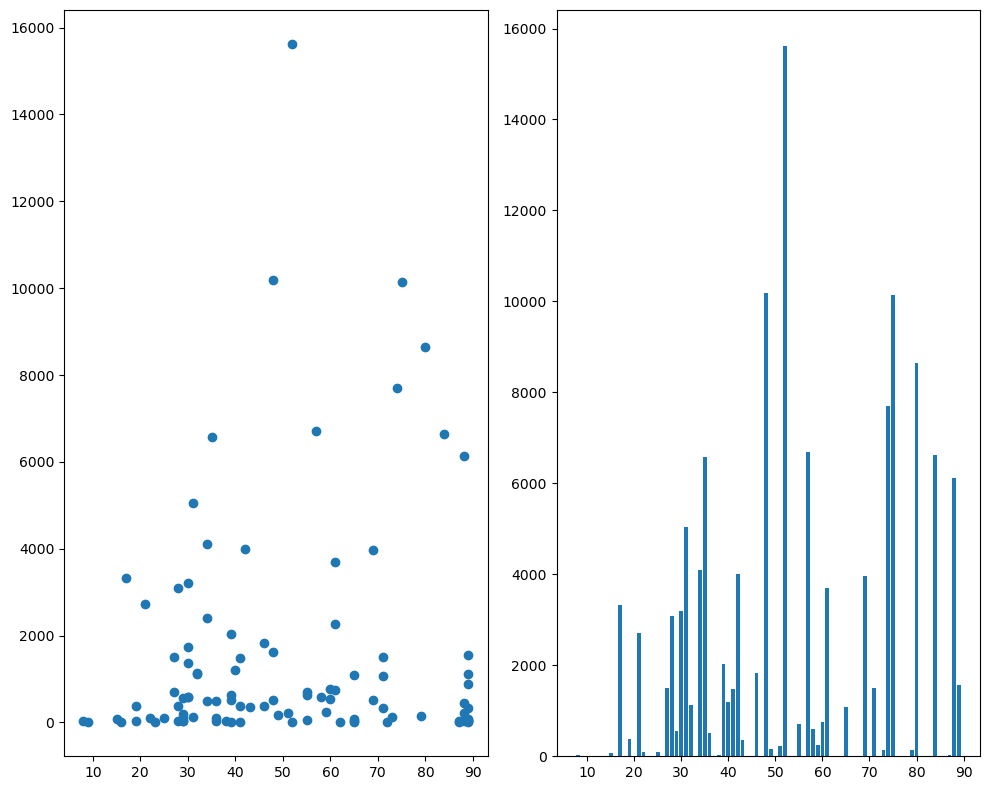

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(10,8)
x = data.head(100)['Срок']
y = data.head(100)['таргет2']
plt.subplot(1,2,1)
plt.scatter(x, y)

plt.subplot(1,2,2)
plt.bar(x, y)

plt.tight_layout()
plt.show()

In [38]:
data

,Категория,таргет2,Цель в долларах,Срок,Год публикации,Close_brent,CAD,CHF,DKK,EUR,...,Design,Fashion,Film & Video,Food,Journalism,Music,Photography,Publishing,Technology,Theater
176128,6035.989239,625.00,1000.00,39,2009,50.96,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
241929,3591.033473,22.00,80000.00,87,2009,50.96,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
244460,3661.424550,35.00,20.00,8,2009,50.96,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
80845,4321.245721,145.00,99.00,79,2009,50.96,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
181197,6035.989239,387.00,1900.00,28,2009,50.96,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247730,7635.064778,269.84,35.98,2,2017,46.05,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
318187,38415.722876,544.77,271.03,4,2017,46.05,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
264474,6098.303122,202.00,200.00,3,2017,46.05,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
293634,38415.722876,265.00,250.00,1,2017,46.05,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
losses_train = []
losses_test = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    Y_train, Y_test = Y.values[train_index], Y.values[test_index]
    scaler_x = StandardScaler()
    scaler_x.fit(X_train)
    X_train_transformed = scaler_x.transform(X_train)
    X_test_transformed = scaler_x.transform(X_test)

    
    model = Lasso()
    model.fit(X_train_transformed, Y_train)

    losses_train.append(np.mean(((model.predict(X_train_transformed) - Y_train) ** 2))**(0.5))
    losses_test.append(np.mean(((model.predict(X_test_transformed) - Y_test) ** 2))**(0.5))
    

In [55]:
np.mean(losses_test)

np.float64(93152.79615148557)

In [56]:
np.mean(losses_train)

np.float64(95894.87115905569)

In [ ]:
X['constant'] = 1
X = X * 1 
X.head()

In [ ]:
import numpy as np
xxt = np.dot(X.T, X)
xxt_inv = np.linalg.inv(xxt)
xxt_inv_xt = np.dot(xxt_inv, X.T)
final_betas = np.dot(xxt_inv_xt, Y)
final_betas

In [ ]:
matrix = np.random.rand(10000, 10000)

In [ ]:
matrixdot = np.dot(matrix.T,matrix)